In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as c

# Problem 2 Computations

In [33]:
def flux(d, n=1):
    const = (c.L_sun / (4*np.pi)).to(u.erg/u.s)
    return n * const * d**-2

def mag(f0, w0, *args, **kwargs):
    f = flux(*args, **kwargs) / w0
    return -2.5*np.log10(f/f0)

def Mag(m, d):
    return m - 5*np.log10(d/(10*u.pc))

In [34]:
# problem a
m_a = mag(f0=3630*1e-12*u.erg/(u.s*u.cm**2*u.AA), w0=5450*u.AA, d=8000*u.pc)
M_a = Mag(m_a, 8000*u.pc)

print(f"m_V = {m_a}\nM_V = {M_a}")

m_V = 18.993555316645523
M_V = 4.478105381685804


In [35]:
# problem b
m_a = mag(f0=3630*1e-12*u.erg/(u.s*u.cm**2*u.AA), w0=5450*u.AA, d=8000*u.pc, n=1e11)
M_a = Mag(m_a, 8000*u.pc)

print(f"m_V = {m_a}\nM_V = {M_a}")

m_V = -8.506444683354477
M_V = -23.021894618314196


# Problem 3 Computations

In [36]:
10**(12/5)

251.18864315095797

# Problem 4 Computations

### (a)

In [57]:
4.67+5-15

-5.33

In [58]:
0.4*-5.33

-2.132

In [61]:
(10**-2.13)**2

5.495408738576248e-05

In [63]:
800*0.0074

5.92

In [64]:
30*5.5e-5

0.00165

In [66]:
40 - (24/0.527)**2

-2033.9641881114321

In [67]:
np.roots([0.0017, 0, 5.92, 0, -2033.96])

array([-4.73142112e-15+61.62321999j, -4.73142112e-15-61.62321999j,
       -1.77501634e+01 +0.j        ,  1.77501634e+01 +0.j        ])

In [68]:
(25*u.uarcsec * 17.7*u.pc).to(u.km * u.rad)

<Quantity 66197.05778475 km rad>

In [83]:
(100*(6.62e4 * u.km / (17.7*u.pc))).cgs

<Quantity 1.21208807e-08>

### (b)

In [69]:
M_G = -3.3
m_G = M_G + 5*np.log10(50e3/10)
m_G

15.194850021680093

In [85]:
z = 10**(0.4*(m_G-15))
z

1.1965752308065947

In [86]:
T = 0.527
T*(40 + 800*z + 30*z**2)**0.5

16.996987409248124

In [87]:
0.27*17.0

4.59

In [73]:
sigma_floor = 0.12
a = 1
b = 2
G_rvs0 = 14

sigma_floor + b*np.exp(a*(m_G - G_rvs0))

6.726124691219922

In [88]:
6.72*60

403.2

# Question 6 Calculations

In [89]:
1/0.546

1.8315018315018314

In [90]:
4.74 * (10.34) * (1000) * (1.832) / 1000

89.7892512

In [91]:
np.sqrt((-108)**2 + 89.79**2)

140.45014809532955

In [93]:
(np.arctan(89.79/-108)*u.rad).to(u.deg)

<Quantity -39.73975893 deg>

Text(0.5, 0, 'Time [yr]')

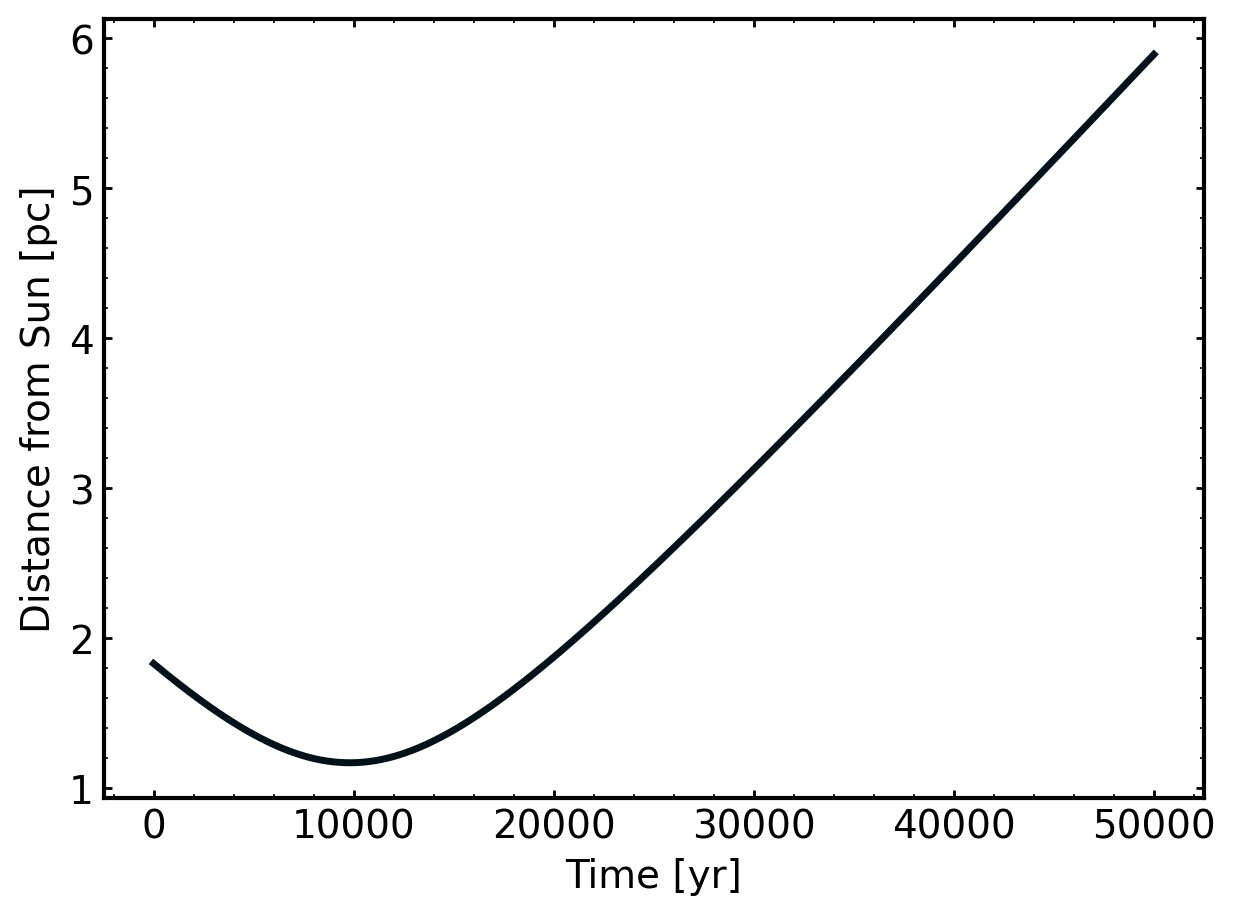

In [124]:
def r(t, v_s=140.45*u.km/u.s, v_r=-108*u.km/u.s, d=1.832*u.pc):
    if not isinstance(t, u.Quantity):
        t *= u.yr
    return (
        (t**2 * v_s**2 + 2*v_r*t*d + d**2)**0.5
    ).to(u.pc)

ts = np.linspace(0, 5e4, int(1e3)) * u.yr

plt.plot(ts, r(ts))
plt.ylabel('Distance from Sun [pc]')
plt.xlabel('Time [yr]')

In [139]:
from scipy.optimize import minimize

res = minimize(r, 30_000*u.yr, tol=1e-100)

res.nit

5

In [140]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.17119869028777
        x: [ 9.808e+03]
      nit: 5
      jac: [ 0.000e+00]
 hess_inv: [[ 5.701e+07]]
     nfev: 44
     njev: 22

In [141]:
9.54 + 5*np.log10(1.171/1.832)

8.568157128702657

# Problem 5

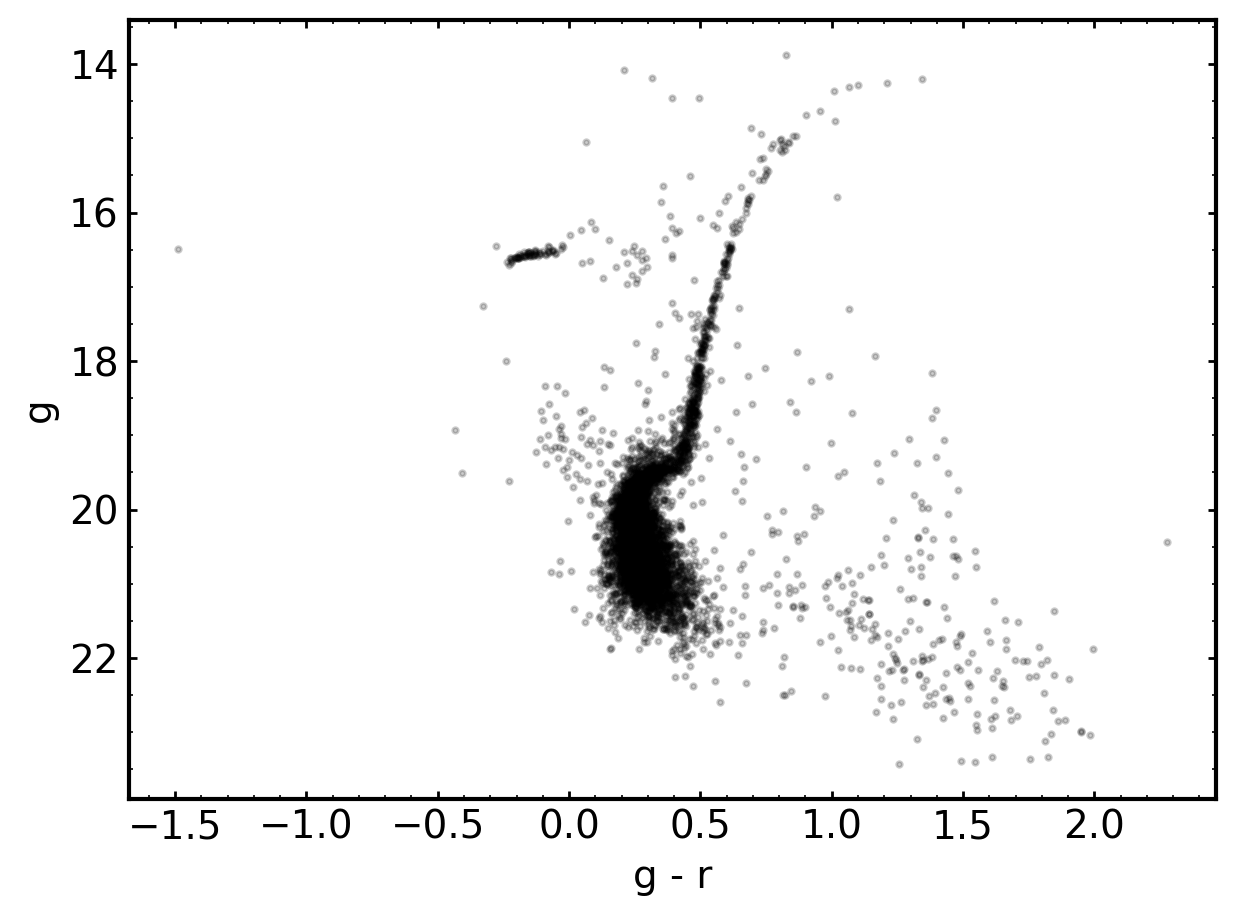

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

nbins = 10

data = pd.read_csv('cluster_18.dat', names=['g', 'r'], sep=' ')

fig, ax = plt.subplots()
x = data.g-data.r
ax.plot(x, data.g, 'o', markersize=2, color='k', alpha=0.2)

fig.gca().invert_yaxis()
ax.set_ylabel('g')
ax.set_xlabel('g - r')

fig.savefig('color-mag.png')

In [23]:
import glob
isochrones = glob.glob("isochrones/SDSSugriz/*.SDSSugriz")

cleaned_isochrones = []
for i in isochrones:
    with open(i, 'r') as f:
        data = f.readlines()

    hdr = data[0:6]
    data = data[6:]

    hdr_vals = [val.strip() for val in hdr[3].split(' ') if val not in {'#', ''}]
    mix_len, Y, Z, Zeff, Fe_H, a_Fe = hdr_vals
    
    isochrones_in_this_file = []
    base_iso = dict(
        idx = [],
        M = [],
        LogTeff = [],
        LogG = [],
        LogL = [],
        u = [],
        g = [],
        r = [],
        i = [],
        z = [],
        age = [],
        mix_len = [],
        Y = [],
        Z = [],
        Zeff = [],
        Fe_H = [],
        a_Fe = [],
    )
    iso = base_iso
    age = None
    for i in range(len(data)):
        if data[i] == '\n':
            i += 3
            isochrones_in_this_file.append(pd.DataFrame(iso))
            iso = base_iso
            continue
        
        line = data[i]
        goodline = [val for val in line.strip().split(' ') if len(val) > 0]

        if len(goodline) != 10:
            if len(goodline) == 3:
                age = goodline[1]
            elif len(goodline) == 2:
                age = goodline[0].split("=")[1]
                
            continue 
        
        for val, key in zip(goodline, iso.keys()):
            # if key == 'age': continue
            iso[key].append(val)

        iso['age'].append(age)
        iso['mix_len'].append(mix_len)
        iso['Y'].append(Y)
        iso['Z'].append(Z)
        iso['Zeff'].append(Zeff)
        iso['Fe_H'].append(Fe_H)
        iso['a_Fe'].append(a_Fe)

    cleaned_isochrones += isochrones_in_this_file

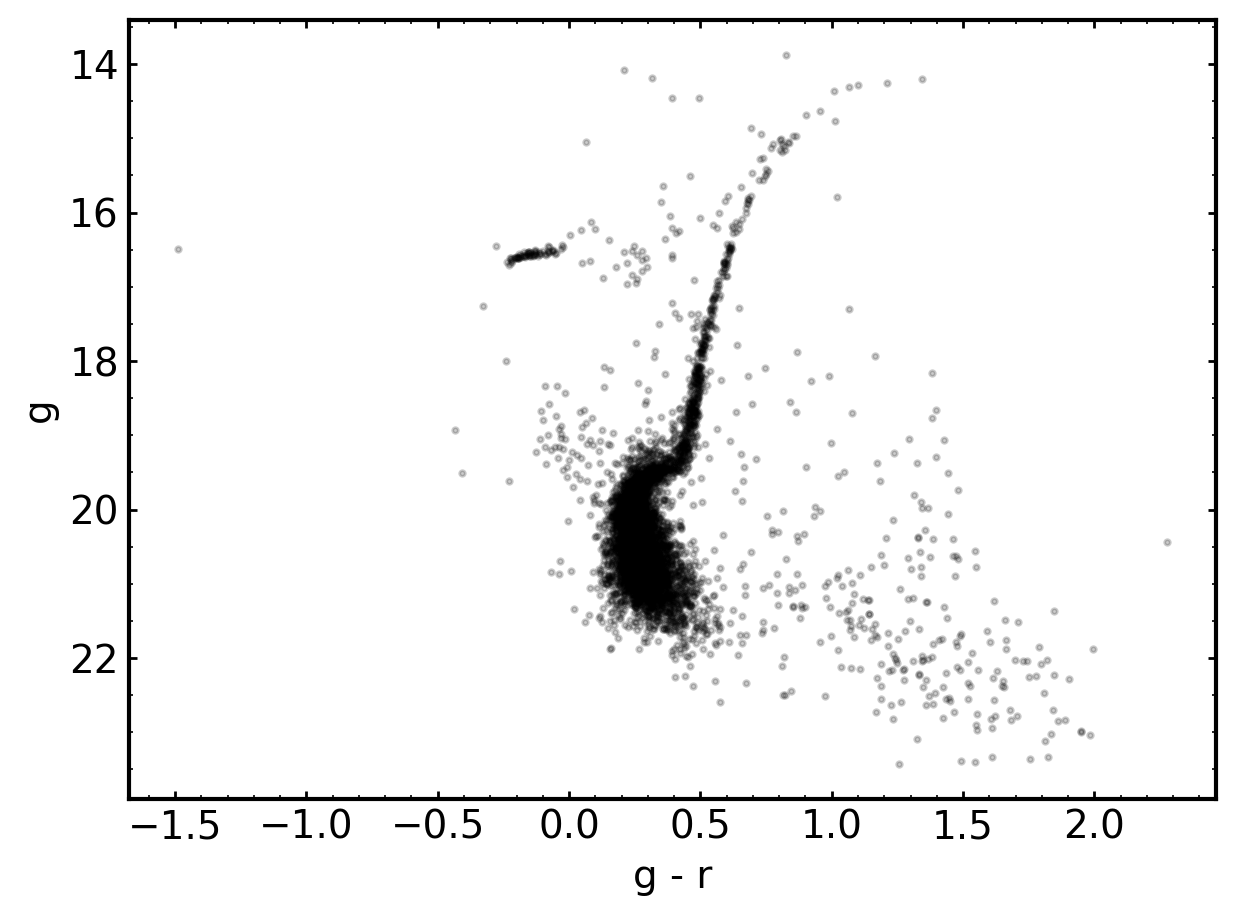

In [31]:
from scipy.interpolate import interp1d

data = pd.read_csv('cluster_18.dat', names=['g', 'r'], sep=' ')

fig, ax = plt.subplots()
x = data.g-data.r
y = data.g
ax.plot(x, y, 'o', markersize=2, color='k', alpha=0.2)

fig.gca().invert_yaxis()
ax.set_ylabel('g')
ax.set_xlabel('g - r')

fig.savefig('color-mag.png')

for df in cleaned_isochrones:

    df = df[df.g != 'sdss_g']
    
    g = df.g.astype(float)
    r = df.r.astype(float)

    fit = interp1d(g-r, g)

    try:
        yfit = fit(x)
    except ValueError:
        continue
        
    rms = np.sqrt((yfit-y)**2)

    print(rms)

    break

In [30]:
list(

['sdss_g',
 '13.9181',
 '13.5961',
 '13.2498',
 '12.8073',
 '12.1160',
 '11.4284',
 '10.8902',
 '10.6290',
 '10.4990',
 '10.3913',
 '10.2808',
 '10.2434',
 '10.2701',
 '10.2578',
 '10.1635',
 '9.9897',
 '9.7549',
 '9.5707',
 '9.4003',
 '9.2238',
 '9.0294',
 '8.8329',
 '8.6526',
 '8.5022',
 '8.3822',
 '8.2799',
 '8.1788',
 '8.0571',
 '7.8896',
 '7.6565',
 '7.3711',
 '7.0850',
 '6.7386',
 '5.1168',
 '4.9604',
 '4.8156',
 '4.6846',
 '4.5453',
 '4.3692',
 '4.1922',
 '4.0353',
 '3.9000',
 '3.7820',
 '3.6723',
 '3.5747',
 '3.4882',
 '3.4081',
 '3.3327',
 '3.2615',
 '3.1965',
 '3.1544',
 '3.1140',
 '3.0762',
 '3.0450',
 '3.0185',
 '2.9938',
 '2.9671',
 '2.9249',
 '2.6133',
 '2.5931',
 '2.5570',
 '2.2593',
 '2.1735',
 '2.1200',
 '2.0862',
 '2.0609',
 '2.0390',
 '2.0181',
 '1.9976',
 '1.9764',
 '1.9540',
 '1.9301',
 '1.9053',
 '1.8800',
 '1.8542',
 '1.8278',
 '1.8009',
 '1.7733',
 '1.7452',
 '1.7165',
 '1.7000',
 '1.6832',
 '1.6659',
 '1.6483',
 '1.6303',
 '1.6119',
 '1.5932',
 '1.5743',
 '1.55